In [6]:
#Import Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Import the datetime module from the datetime library.
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [7]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [8]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [9]:

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)



627

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 3 of Set 1 | atuona
Processing Record 4 of Set 1 | auki
Processing Record 5 of Set 1 | butaritari
Processing Record 6 of Set 1 | pacific grove
Processing Record 7 of Set 1 | san nicolas
Processing Record 8 of Set 1 | rikitea
Processing Record 9 of Set 1 | boissevain
Processing Record 10 of Set 1 | pevek
Processing Record 11 of Set 1 | albany
Processing Record 12 of Set 1 | dingle
Processing Record 13 of Set 1 | busselton
Processing Record 14 of Set 1 | the valley
Processing Record 15 of Set 1 | yerbogachen
Processing Record 16 of Set 1 | saint-philippe
Processing Record 17 of Set 1 | kihei
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | dunedin
Processing Record 20 of Set 1 | yellowknife
Processing Record 21 of Set 1 | aquiraz
Processing Record 22 of Set 1 | burica
City not found

Processing Record 38 of Set 4 | griffith
Processing Record 39 of Set 4 | grindavik
Processing Record 40 of Set 4 | beloha
Processing Record 41 of Set 4 | tazovskiy
Processing Record 42 of Set 4 | klaksvik
Processing Record 43 of Set 4 | castro
Processing Record 44 of Set 4 | kostomuksha
Processing Record 45 of Set 4 | nemuro
Processing Record 46 of Set 4 | finschhafen
Processing Record 47 of Set 4 | fairbanks
Processing Record 48 of Set 4 | yanan
City not found. Skipping...
Processing Record 49 of Set 4 | zanesville
Processing Record 50 of Set 4 | jiddah
City not found. Skipping...
Processing Record 1 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 2 of Set 5 | waipawa
Processing Record 3 of Set 5 | hasaki
Processing Record 4 of Set 5 | terre-de-bas
Processing Record 5 of Set 5 | betioky
Processing Record 6 of Set 5 | billings
Processing Record 7 of Set 5 | hithadhoo
Processing Record 8 of Set 5 | gat
Processing Record 9 of Set 5 | kuala krai
City not found. Skip

City not found. Skipping...
Processing Record 28 of Set 8 | nuuk
Processing Record 29 of Set 8 | shenjiamen
Processing Record 30 of Set 8 | sisimiut
Processing Record 31 of Set 8 | khani
Processing Record 32 of Set 8 | yunyang
Processing Record 33 of Set 8 | surab
Processing Record 34 of Set 8 | hofn
Processing Record 35 of Set 8 | nova praha
Processing Record 36 of Set 8 | kruisfontein
Processing Record 37 of Set 8 | manokwari
Processing Record 38 of Set 8 | brownsville
Processing Record 39 of Set 8 | tabou
Processing Record 40 of Set 8 | hohhot
Processing Record 41 of Set 8 | saskylakh
Processing Record 42 of Set 8 | cowansville
Processing Record 43 of Set 8 | bongor
Processing Record 44 of Set 8 | talara
Processing Record 45 of Set 8 | kaeo
Processing Record 46 of Set 8 | boca do acre
Processing Record 47 of Set 8 | kahului
Processing Record 48 of Set 8 | ituporanga
Processing Record 49 of Set 8 | fort saint james
Processing Record 50 of Set 8 | erzin
Processing Record 1 of Set 9 | 

Processing Record 16 of Set 12 | sarankhola
Processing Record 17 of Set 12 | sao gabriel da cachoeira
Processing Record 18 of Set 12 | colorado
Processing Record 19 of Set 12 | novovarshavka
Processing Record 20 of Set 12 | manicore
Processing Record 21 of Set 12 | garowe
Processing Record 22 of Set 12 | paso de los toros
Processing Record 23 of Set 12 | mezen
Processing Record 24 of Set 12 | sawtell
Processing Record 25 of Set 12 | banjar
Processing Record 26 of Set 12 | dryden
Processing Record 27 of Set 12 | mason city
Processing Record 28 of Set 12 | azimur
City not found. Skipping...
Processing Record 29 of Set 12 | simplicio mendes
Processing Record 30 of Set 12 | zavyalovo
Processing Record 31 of Set 12 | juchitlan
Processing Record 32 of Set 12 | minab
Processing Record 33 of Set 12 | aksu
Processing Record 34 of Set 12 | karasjok
Processing Record 35 of Set 12 | tiznit
Processing Record 36 of Set 12 | codrington
Processing Record 37 of Set 12 | harindanga
Processing Record 38 

In [12]:
len(city_data)

577

In [25]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Jamestown,42.10,-79.24,33.01,95,90,13.35,US,2021-01-02 00:50:23
1,Atuona,-9.80,-139.03,78.15,73,0,15.52,PF,2021-01-02 00:50:24
2,Auki,-8.77,160.70,87.49,60,100,1.59,SB,2021-01-02 00:50:24
3,Butaritari,3.07,172.79,80.94,77,89,17.65,KI,2021-01-02 00:50:24
4,Pacific Grove,36.62,-121.92,55.40,76,1,5.82,US,2021-01-02 00:50:24
5,San Nicolas,18.17,120.60,75.20,73,20,6.93,PH,2021-01-02 00:50:25
6,Rikitea,-23.12,-134.97,78.15,69,95,11.27,PF,2021-01-02 00:50:25
7,Boissevain,49.23,-100.06,21.00,100,20,13.87,CA,2021-01-02 00:50:25
8,Pevek,69.70,170.31,-18.67,89,100,5.50,RU,2021-01-02 00:50:25
9,Albany,42.60,-73.97,30.99,77,100,8.68,US,2021-01-02 00:49:42


In [26]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df_final = city_data_df[new_column_order]

In [27]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df_final.to_csv(output_data_file, index_label="City_ID")

In [28]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df_final["Lat"]
max_temps = city_data_df_final["Max Temp"]
humidity = city_data_df_final["Humidity"]
cloudiness = city_data_df_final["Cloudiness"]
wind_speed = city_data_df_final["Wind Speed"]

In [29]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.strftime("%x")

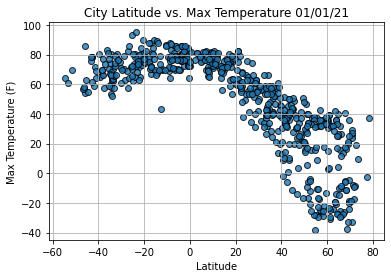

In [30]:
#Build Scatterplot
plt.scatter(lats, 
            max_temps, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

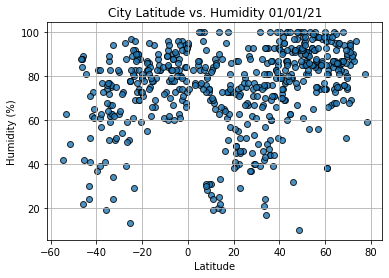

In [31]:
#Build Scatterplot
plt.scatter(lats, 
            humidity, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

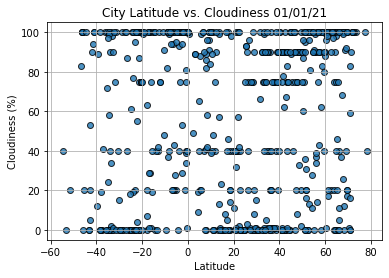

In [32]:
#Build Scatterplot
plt.scatter(lats, 
            cloudiness, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig3.png")

# Show plot.
plt.show()

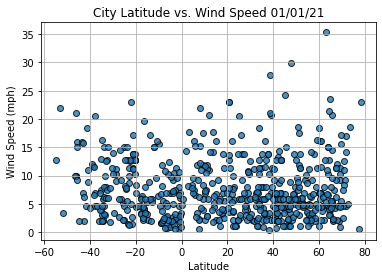

In [33]:
#Build Scatterplot
plt.scatter(lats, 
            wind_speed, 
            edgecolor='black', linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig4.png")

# Show plot.
plt.show()

In [56]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [57]:
#Create Northern & Southern Hemisphere Data Frames
northern_hemi_df = city_data_df_final.loc[(city_data_df_final["Lat"] >= 0)]
southern_hemi_df = city_data_df_final.loc[(city_data_df_final["Lat"] < 0)]

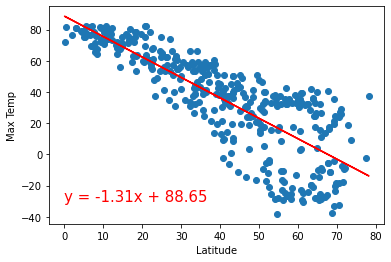

LinregressResult(slope=-1.3103438748612317, intercept=88.65110504230458, rvalue=-0.8153904540786991, pvalue=1.796667233723926e-92, stderr=0.047661671945866346)

In [78]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(0,-30))
linregress(x_values, y_values)

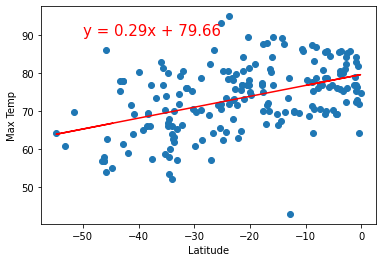

LinregressResult(slope=0.28684910742886466, intercept=79.66287727378584, rvalue=0.4509457281854721, pvalue=4.157267851664076e-11, stderr=0.04097432735541281)

In [66]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))
linregress(x_values, y_values)

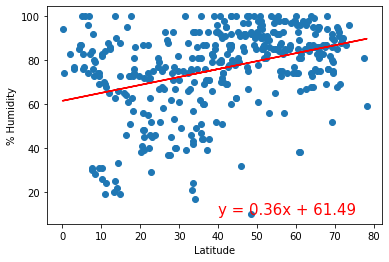

LinregressResult(slope=0.3614586025100159, intercept=61.490769862199315, rvalue=0.36849203844194445, pvalue=9.207557171378923e-14, stderr=0.04671738454324303)

In [67]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))
linregress(x_values, y_values)

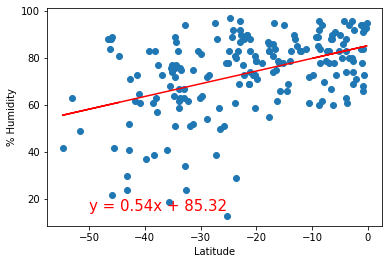

LinregressResult(slope=0.5388525466389338, intercept=85.32090253185538, rvalue=0.44462594418003254, pvalue=8.313953112257625e-11, stderr=0.07834206664128122)

In [68]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))
linregress(x_values, y_values)

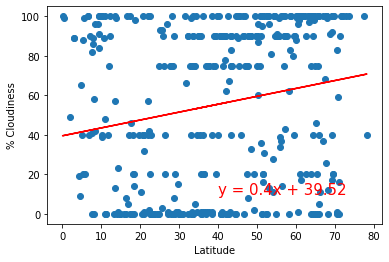

LinregressResult(slope=0.3993780932871364, intercept=39.51930954086019, rvalue=0.19403624007909806, pvalue=0.00013273315756977776, stderr=0.10344402536456747)

In [69]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(40,10))
linregress(x_values, y_values)

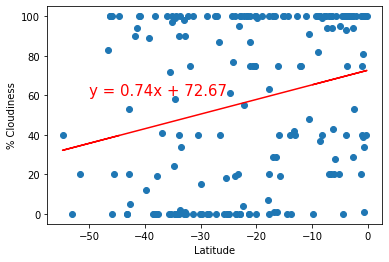

LinregressResult(slope=0.7389719308438512, intercept=72.67017575410554, rvalue=0.24552239521991046, pvalue=0.0005593400508349799, stderr=0.2105645045578206)

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))
linregress(x_values, y_values)

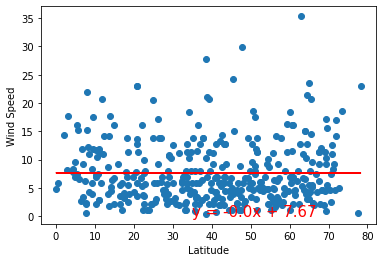

LinregressResult(slope=-0.0004588977070748666, intercept=7.668069053386122, rvalue=-0.0016583748425783797, pvalue=0.974193753615918, stderr=0.014176535238577448)

In [77]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed',(40,35))
linregress(x_values, y_values)

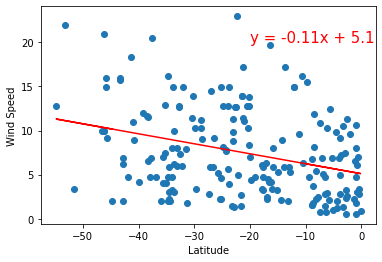

LinregressResult(slope=-0.11321135846545226, intercept=5.1030385575645685, rvalue=-0.3164392902048604, pvalue=6.955091611892044e-06, stderr=0.024492772552668397)

In [82]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed (mph)', 'Wind Speed',(-20,20))
linregress(x_values, y_values)